In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('internship_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [5]:
print(df.isnull().any())

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
target    False
dtype: bool


# Removing duplicated columns if there are some

In [6]:
X = df[df.columns[:53]]

In [7]:
colsToRemove = []
colsScaned = []
dupList = {}
columns = X.columns

for i in range(len(columns)-1):
    v = X[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, X[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
X.drop(colsToRemove, axis=1, inplace=True) 

print("Removed `{}` Duplicate Columns\n".format(len(dupList)))
print(dupList)



Removed `0` Duplicate Columns

{}


C:\Users\user\anaconda3\envs\Quantom\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
with pd.option_context('display.max_columns', 55):
    print(df.describe(include='all'))

                  0             1             2             3             4  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.423944    250.236267    248.637289    249.736600    249.436178   
std      144.336393    144.022200    144.107577    144.284945    143.941581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      125.000000    126.000000    124.000000    125.000000    125.000000   
50%      250.000000    251.000000    248.000000    250.000000    250.000000   
75%      374.000000    375.000000    374.000000    375.000000    373.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.656167     -0.011402      0.498548      0.499189    249.842033   
std      144.329168      7.038171      0.288682    

# Profiling 

In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(df, title = 'Input data' )

In [11]:
# profile

for git ProfileReport was too heavy(whole Analysis file can be downloaded by link (https://drive.google.com/drive/folders/1zk-XGjVuvakH8YwgTGh5pPdormoZW-T8?usp=sharing)

By analysis ProfileReport:

    - 6 and 8 column lineary dependent
    
    - 6 and target non-linearly dependent
When data has non-linearly dependency better to use NN. But we deal with relatively small database with tabular data, so advanced classical ML algorithms must show good results. For example random Foresе, xgboost or even simpl decision tree.

For greater clarity builded correlation matrix using pandas method corr

# Correlation matrix 

In [12]:
corr_matrix = df.corr()

In [13]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


In [14]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [15]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [16]:
print(get_top_abs_correlations(df, 3))

6   8         0.940016
7   target    0.012103
31  33        0.011606
dtype: float64


In [17]:
columns = corr_matrix.nlargest(5, 'target').index
val = corr_matrix.nlargest(5, 'target')
columns

Index(['target', '7', '26', '39', '31'], dtype='object')

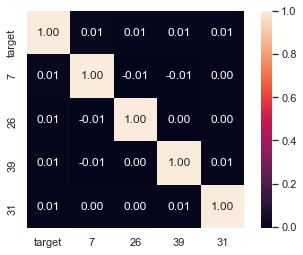

In [18]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

# By correlation matrix(Pearson coef) there are:
- not proven linearly dependency between target and features(0.01 is low value)
- strong linear dependency between 6 and 8 column. So we can make decision about dropping out one of this features

(array([16312., 12529.,  9017.,  5404.,  1376.,  2234.,  5473.,  8848.,
        12577., 16230.]),
 array([-9.94987437, -7.9598995 , -5.96992462, -3.97994975, -1.98997487,
         0.        ,  1.98997487,  3.97994975,  5.96992462,  7.9598995 ,
         9.94987437]),
 <BarContainer object of 10 artists>)

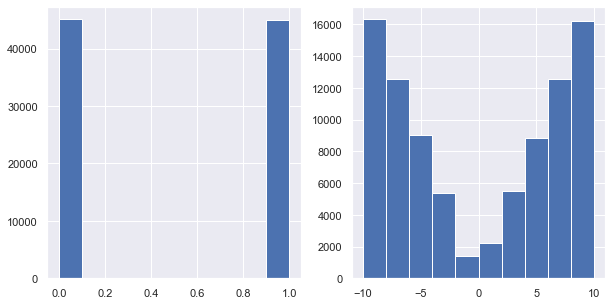

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.hist(df['8'])
ax2.hist(df['6'])


### Thus one of feature is binary. As we deal with regression problem I would exclude binary feature(8). Also we can build 2 models with 8 feature, and with 6th

## Phik (φk) coefficient calculated using pandas profiling says about dependency 6th feature and target. So we need to use 6th feature for modeling. 

In [20]:
Y = df['target']

# Feature Importance
Next we can define which feature more effects on target by building simple decision tree(or "forest of trees" results the same).

In [21]:
tree = DecisionTreeRegressor()
tree = tree.fit(X, Y)

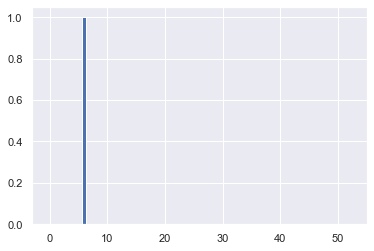

In [22]:
importances = tree.feature_importances_
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [23]:
feature_imp = {}
for i,v in enumerate(importances):
    feature_imp[i] = v
#     print('Feature: %0d, Score: %.5f' % (i,v))

In [24]:
sorted_importances = dict(sorted(feature_imp.items(), key=lambda item: item[1], reverse=True))
dict(list(sorted_importances.items())[0:2])

{6: 0.9999004303697143, 7: 9.955456166638299e-05}

## So 6th feature the most important according to decision tree regression. Thus we wouldn't exclude it from modeling. 6th feature also by Phik (φk) has correlation with target. We can try to model only on 6th feature and all data and compare results

# Further modeling depends on our computational capabilities and time constraints. 
Fistly let's build model on all data thus next it will be possible to compare results.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
xgb_model = XGBRegressor(eval_metric = 'rmse')

[0]	validation_0-rmse:40.27552	validation_1-rmse:40.06448
[1]	validation_0-rmse:28.23397	validation_1-rmse:28.08606
[2]	validation_0-rmse:19.79679	validation_1-rmse:19.69503
[3]	validation_0-rmse:13.88098	validation_1-rmse:13.80998
[4]	validation_0-rmse:9.74017	validation_1-rmse:9.69042
[5]	validation_0-rmse:6.83685	validation_1-rmse:6.80234
[6]	validation_0-rmse:4.80659	validation_1-rmse:4.78345
[7]	validation_0-rmse:3.38672	validation_1-rmse:3.37151
[8]	validation_0-rmse:2.39402	validation_1-rmse:2.38438
[9]	validation_0-rmse:1.70820	validation_1-rmse:1.70308
[10]	validation_0-rmse:1.23125	validation_1-rmse:1.22946
[11]	validation_0-rmse:0.91106	validation_1-rmse:0.91226
[12]	validation_0-rmse:0.70042	validation_1-rmse:0.70345
[13]	validation_0-rmse:0.54946	validation_1-rmse:0.55292
[14]	validation_0-rmse:0.44302	validation_1-rmse:0.44794
[15]	validation_0-rmse:0.38283	validation_1-rmse:0.38972
[16]	validation_0-rmse:0.34569	validation_1-rmse:0.35388
[17]	validation_0-rmse:0.31490	va

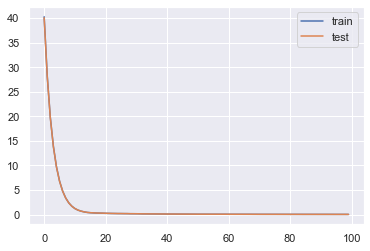

In [27]:

evalset = [(X_train, y_train), (X_test,y_test)]
xgb_model.fit(X_train, y_train, eval_metric= 'rmse', eval_set=evalset)
yhat = xgb_model.predict(X_test)



results = xgb_model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
plt.legend()
plt.show()

In [28]:
score = mean_squared_error(y_test, yhat, squared = False)
print('rmse: %.3f' % score)


rmse: 0.041


# Drop linear dependent feature and normalize data 

In [29]:
df_without_8 = df.drop(['8'], axis=1)
df_without_8.head()

,0,1,2,3,4,5,6,7,9,10,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,132,281,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,143,109,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,430,488,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,340,111,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,212,141,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [30]:
X_without_8 = df[df.columns[:52]]
X_without_8.shape

(90000, 52)

# Normalization 
According to df.describe() our data in different ranges so we need to normalize data

In [31]:
scaler = StandardScaler() 
normalized_x = scaler.fit_transform(X_without_8)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(normalized_x, Y, test_size=0.33, random_state=42)

[0]	validation_0-rmse:40.27552	validation_1-rmse:40.06448
[1]	validation_0-rmse:28.23397	validation_1-rmse:28.08606
[2]	validation_0-rmse:19.79679	validation_1-rmse:19.69503
[3]	validation_0-rmse:13.88098	validation_1-rmse:13.80998
[4]	validation_0-rmse:9.74017	validation_1-rmse:9.69042
[5]	validation_0-rmse:6.83685	validation_1-rmse:6.80234
[6]	validation_0-rmse:4.80659	validation_1-rmse:4.78345
[7]	validation_0-rmse:3.38672	validation_1-rmse:3.37151
[8]	validation_0-rmse:2.39402	validation_1-rmse:2.38438
[9]	validation_0-rmse:1.70820	validation_1-rmse:1.70308
[10]	validation_0-rmse:1.23125	validation_1-rmse:1.22946
[11]	validation_0-rmse:0.91106	validation_1-rmse:0.91226
[12]	validation_0-rmse:0.70042	validation_1-rmse:0.70345
[13]	validation_0-rmse:0.54946	validation_1-rmse:0.55292
[14]	validation_0-rmse:0.44302	validation_1-rmse:0.44794
[15]	validation_0-rmse:0.38283	validation_1-rmse:0.38972
[16]	validation_0-rmse:0.34569	validation_1-rmse:0.35388
[17]	validation_0-rmse:0.31490	va

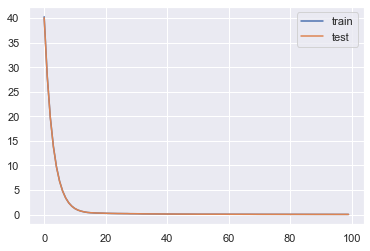

In [33]:
evalset = [(X_train, y_train), (X_test,y_test)]
xgb_model.fit(X_train, y_train, eval_metric= 'rmse', eval_set=evalset)
yhat = xgb_model.predict(X_test)



results = xgb_model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
plt.legend()
plt.show()

In [34]:
score = mean_squared_error(y_test, yhat, squared = False)
print('rmse: %.3f' % score)

rmse: 0.040


### Deleting 8th feature not really cricial for tree based model, but if will use other models they can overfit more to dependent features. So better to drop 8th feature

# Try diff regressors

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I implement standardisation using pipelines. I then use cross-validation to validate performance of algorithms in totality.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_without_8, Y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [37]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDTree', Pipeline([('Scaler', StandardScaler()),('DTree', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -28.882486 (0.175111)
ScaledLASSO: -28.870033 (0.174786)
ScaledEN: -28.870033 (0.174786)
ScaledKNN: -29.770380 (0.222525)
ScaledDTree: -0.010210 (0.000170)
ScaledGBM: -0.419921 (0.011660)


No wonder that linear models works bad on our data even with regularisation. 

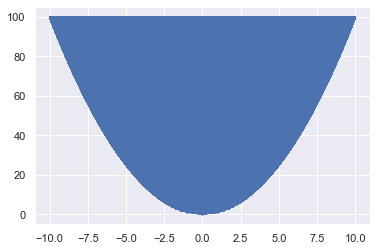

In [38]:
plt.plot(df['6'].to_numpy(),Y) # 6 - the most important feature
plt.show()

From the output above, it looks like the Decision Tree Regressor operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Decision Tree Regressor. The Decision Tree Regressor will be tested with a few n_estimators using the GridSearchCV function.

### Modeling on all data except 8th feature

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_without_8, Y, test_size=0.33, random_state=42)

In [40]:
dtr_pipe = Pipeline([('Scaler', StandardScaler()),('DecisionTree', DecisionTreeRegressor())])

In [41]:
%%time
dtr_pipe.fit(X_train, y_train)

Wall time: 3.34 s


Pipeline(steps=[('Scaler', StandardScaler()),
                ('DecisionTree', DecisionTreeRegressor())])

In [42]:
mean_squared_error(y_test, dtr_pipe.predict(X_test), squared = False) 

0.009255244989101135

### Modeling on one the most important feature 

In [43]:
X_only_6 = df['6'].to_numpy().reshape(-1, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_only_6, Y, test_size=0.33, random_state=42)

In [45]:
dtr_pipe = Pipeline([('Scaler', StandardScaler()),('DecisionTree', DecisionTreeRegressor())])

In [46]:
%%time
dtr_pipe.fit(X_train, y_train)

Wall time: 24 ms


Pipeline(steps=[('Scaler', StandardScaler()),
                ('DecisionTree', DecisionTreeRegressor())])

In [47]:
mean_squared_error(y_test, dtr_pipe.predict(X_test), squared = False) 

0.2890279241199557

## As we can see DecisionTreeRegressor on 52 features(except 8th linear dependent feature) 
- with criterion ”mse”, splitter ”best”, max_depthint, default=None, min_samples_leafint =1, min_weight_fraction_leaffloat=0.0 
## shows the lowest RMSE = 0.009. So we can choose this model, but before will find optimal hyperparameters


# GridSearchCV on all data without 8th feature

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_without_8, Y, test_size=0.33, random_state=42)

In [49]:
%%time
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {"min_samples_split": [2, 5, 10],
              "max_depth": [2, 8, 16, 20],
              "min_samples_leaf": [1, 5]
              }

dtr = DecisionTreeRegressor(random_state=21)

kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.009567 using {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Wall time: 7min 29s


according to results if demanded lower RMSE - better use default model, if 0.009567 is axceptlbe value best params:
'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2

max_depth must be higher in default model

# Finalise and validate model

In [50]:
# class for droping 8th feature
class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X.drop(['8'], axis=1)
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [52]:


dtr_pipe = Pipeline([('Drop dep', SelectColumnsTransformer()),('Scaler', StandardScaler()),('DecisionTree', DecisionTreeRegressor('max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2))])
dtr_pipe.fit(X_train, y_train)

predictions = dtr_pipe.predict(X_test)
print (mean_squared_error(y_test, predictions, squared = False))


0.009385629487700883


# Predict and save to csv

In [53]:
test_data = pd.read_csv('internship_hidden_test.csv')
predict_x = dtr_pipe.predict(test_data)
np.savetxt("predict.csv", predict_x, delimiter=",")

# Concusion
#### Preprocessing 

       - After data analysis it was decided to leave 52 features for building a model, except for 8 - linear dependent feature with 6th. 52 features - an acceptable count of features for modeling if accuracy is critical. Further dimensionality reduction is possible with knowledge of the information about the columns.  
       - Features have different scales, so it was normalized
#### Model
       - Tested bunch of methods for modeling through cross validation chose Decision Tree Regressor. It is simple model that performs good on our data